
# IFCD104 – Tema 5 · **Ejercicio FNN (Feedforward / MLP) con IRIS** – PLANTILLA

**Instrucciones:** completa las celdas marcadas con **TODO**.  
Objetivo: entrenar una FNN para clasificar el dataset *Iris* y evaluar su rendimiento.

## Criterios de entrega
- Entrenar con *EarlyStopping*.
- Mostrar **accuracy** y **matriz de confusión** en test.
- Añadir 3 predicciones con el vector de probabilidades (*softmax*).


## 1) Imports y utilidades

In [1]:

# TODO: importa numpy, matplotlib, sklearn (datasets, model_selection, preprocessing, metrics)
# TODO: importa tensorflow.keras (keras, layers)

# Sugerencia:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix, classification_report
# import itertools
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



## 2) Cargar y preparar datos (IRIS)

In [ ]:

# TODO: carga IRIS, separa X, y y los nombres de clase
# TODO: realiza split en train/val/test (60/20/20) con stratify
# TODO: estandariza con StandardScaler

# print("Shapes ->", X_train.shape, X_val.shape, X_test.shape)
# print("Clases  ->", class_names)

# Carga el dataset IRIS
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
# Realiza el split en train/val/test (60/20/20) con stratify
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)  # 0.25
# Estandariza con StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Shapes ->", X_train.shape, X_val.shape, X_test.shape)
print("Clases  ->", class_names)

    


Shapes -> (90, 4) (30, 4) (30, 4)
Clases  -> ['setosa' 'versicolor' 'virginica']


## 3) Construcción de la red FNN (MLP)

In [5]:

# TODO: construye una FNN con dos capas ocultas (8 y 6 neuronas, ReLU) y salida softmax
# Sugerencia:
# def build_fnn(input_dim, n_classes):
#     ...
# model = build_fnn(input_dim=X_train.shape[1], n_classes=len(class_names))
# model.compile(optimizer=keras.optimizers.Adam(1e-2),
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])
# model.summary()

# Construye una FNN con dos capas ocultas (8 y 6 neuronas, ReLU) y salida softmax
def build_fnn(input_dim, n_classes):
    model = keras.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(6, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ])
    return model

model = build_fnn(input_dim=X_train.shape[1], n_classes=len(class_names))
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

        


c:\Users\Alumno\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

## 4) Entrenamiento

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4556 - loss: 1.0144 - val_accuracy: 0.4000 - val_loss: 1.0129
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.9060 - val_accuracy: 0.4667 - val_loss: 0.9161
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5889 - loss: 0.8056 - val_accuracy: 0.5333 - val_loss: 0.8084
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6667 - loss: 0.7053 - val_accuracy: 0.7667 - val_loss: 0.6971
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8556 - loss: 0.6075 - val_accuracy: 0.8000 - val_loss: 0.5950
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8667 - loss: 0.5165 - val_accuracy: 0.8000 - val_loss: 0.5103
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8667 - loss: 0.4397 - val_accuracy: 0.8000 - val_loss: 0.4447
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8778 - loss: 0.3747 - val_accuracy: 0.8000 - val_loss:

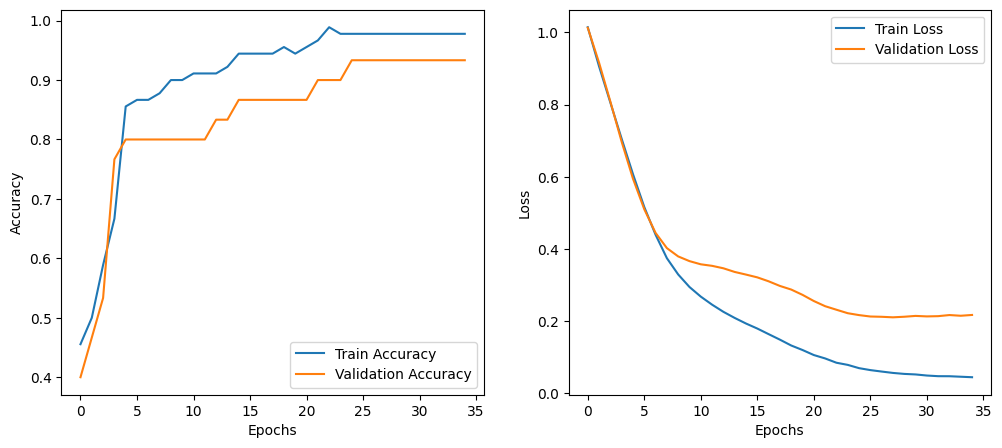

In [6]:

# TODO: entrena con EarlyStopping (monitor='val_accuracy', restore_best_weights=True)
# history = model.fit(...)

# TODO: grafica curvas de accuracy y loss (train/val)

# Entrena con EarlyStopping (monitor='val_accuracy', restore_best_weights=True)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping], verbose=1)

# Grafica curvas de accuracy y loss (train/val)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




## 5) Evaluación en test

Test Accuracy: 0.9333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicciones: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]
Matriz de Confusión:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion matrix, without normalization
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


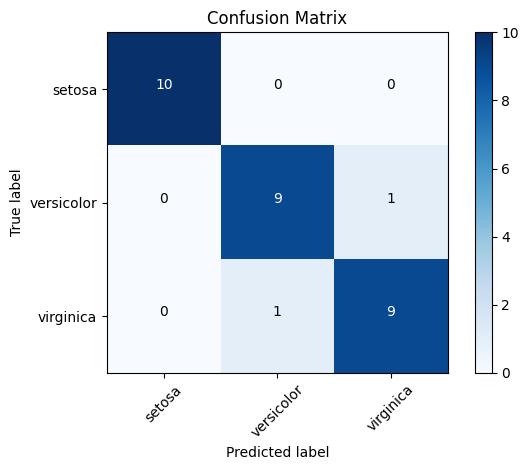

In [7]:

# TODO: evalúa en test (accuracy)
# TODO: genera predicciones y matriz de confusión + classification_report

# Evalúa en test (accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Genera predicciones
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Predicciones:", y_pred)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Grafica la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()



## 6) Predicciones con ejemplos nuevos

In [8]:

# TODO: imprime al menos 3 predicciones del set de test
# Formato recomendado:
# "Ejemplo i: predicción={nombre_clase}, prob={p:.3f} | vector_probs={...}"

# Imprime al menos 3 predicciones del set de test
for i in range(3):
    sample = X_test[i].reshape(1, -1)
    probs = model.predict(sample)[0]
    pred_class = class_names[np.argmax(probs)]
    pred_prob = np.max(probs)
    print(f"Ejemplo {i}: predicción={pred_class}, prob={pred_prob:.3f} | vector_probs={probs}")
    
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Ejemplo 0: predicción=setosa, prob=1.000 | vector_probs=[9.9981600e-01 1.4436229e-04 3.9706225e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Ejemplo 1: predicción=virginica, prob=0.903 | vector_probs=[0.0011596  0.09604525 0.90279514]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Ejemplo 2: predicción=versicolor, prob=0.975 | vector_probs=[0.02253471 0.97476226 0.00270307]
